In [4]:
import numpy as np
from pprint import pprint

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_validate, RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
from scipy.stats import loguniform

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('figure', figsize=(8, 6))

In [9]:
import ssl
import urllib.request
from sklearn.datasets import fetch_openml

ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.install_opener(
    urllib.request.build_opener(
        urllib.request.HTTPSHandler(context=ssl._create_default_https_context())
    )
)

X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True)

print(X.shape, y.shape)

(70000, 784) (70000,)


In [10]:
X = X.to_numpy()
y = y.to_numpy()

In [11]:
scaler = MinMaxScaler()
x  = scaler.fit_transform(X)

In [12]:
print('Mean: ', np.mean(x))
print('Standard Deviation: ', np.std(x))
print('Minimum Value: ', np.min(x))
print('Maximum Value: ', np.max(x))

Mean:  0.13092720382627604
Standard Deviation:  0.3084510570135976
Minimum Value:  0.0
Maximum Value:  1.0


In [13]:
target_names = np.unique(y)
print("Number of samples: {0}, type: {1}".format(X.shape[0], x.dtype))
print('Number of features: {0}'.format(x.shape[1]))
print("Number of classes: {0}, type: {1}".format(len(target_names), y.dtype))
print("Labels: ",target_names)

Number of samples: 70000, type: float64
Number of features: 784
Number of classes: 10, type: object
Labels:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


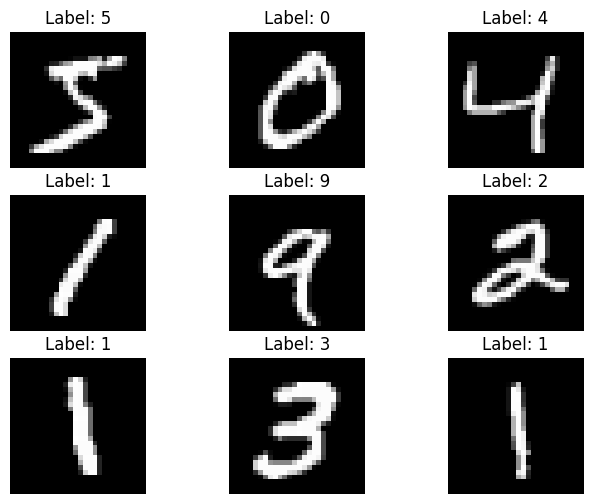

In [14]:
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor):
        ax[i, j].imshow(X[index + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label: {0}'.format(str(y[index + j])))
        ax[i, j].set_axis_off()

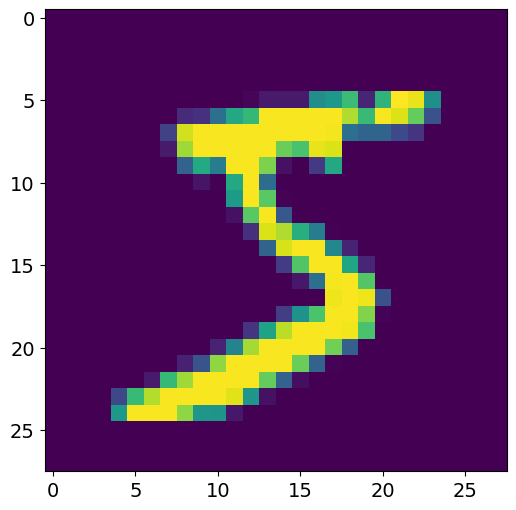

In [15]:
plt.figure(figsize=(6, 6))
plt.imshow(X[0].reshape(28, 28))
plt.show()

In [16]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

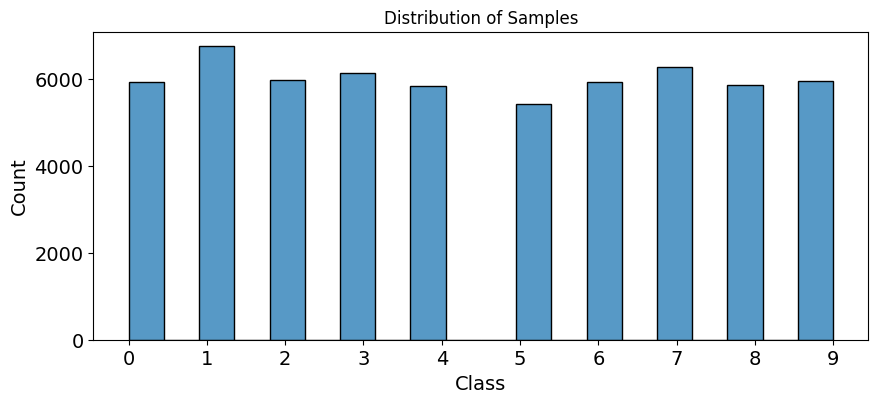

In [17]:
plt.figure(figsize=(10, 4))
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

In [18]:
y_train_0 = np.zeros((len(y_train)))
y_test_0 = np.zeros((len(y_test)))

indx_0 = np.where(y_train == '0')
y_train_0[indx_0] = 1

indx_0 = np.where(y_test == '0')
y_test[indx_0] = 1

In [19]:
print(y_train)
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[0. 1. 0. ... 0. 0. 0.]


In [20]:
print(np.where(y_train=='0'))
print(np.where(y_train_0==1))

(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)


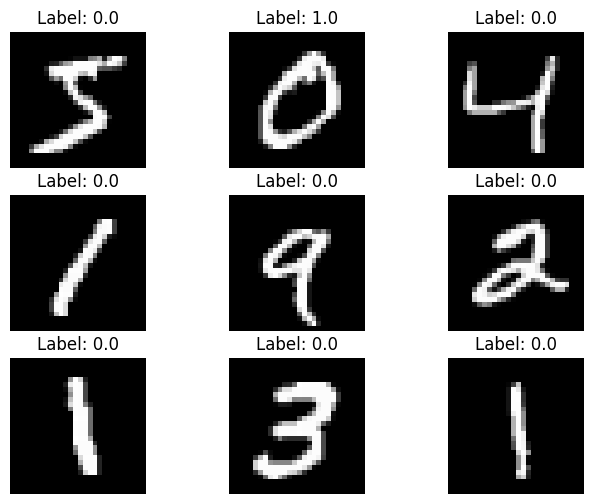

In [21]:
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor):
        ax[i, j].imshow(X[index + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label: {0}'.format(str(y_train_0[index + j])))
        ax[i, j].set_axis_off()

## Baseline Models

In [22]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==0)[0])
print(num_neg, num_pos)

54077 5923


In [23]:
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(x_train, y_train_0)
print(base_clf.score(x_train, y_train_0))

0.9012833333333333


## Logistic Regression

In [25]:
SGD_Bin = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.01,
    alpha=0,
    learning_rate='constant',
    random_state=1729
)
Loss = []
iterations = 100
for i in range(iterations):
    SGD_Bin.fit(x_train, y_train_0)
    y_pred = SGD_Bin.predict_proba(x_train)
    Loss.append(log_loss(y_train_0, y_pred))

/Users/satviksawhney/Downloads/IITMadras/MLP (Practical)/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/satviksawhney/Downloads/IITMadras/MLP (Practical)/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/satviksawhney/Downloads/IITMadras/MLP (Practical)/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/satviksawhney/Downloads/IITMadras/MLP (Practical)/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: Conver